In [1]:
# Example pairs of points
points_list = [
    (1661, 627, 1199, 885),
    (1666, 885, 1210, 1083),
    (1782, 1496, 1320, 1606),
    (1820, 1551, 1287, 1655),
    (2332, 577, 1831, 913),
    (2332, 803, 1837, 1133),
    (2238, 1358, 1760, 1688),
    (2282, 1408, 1727, 1738),
]

# Creating an empty 8x8 matrix
matrix_8x8 = [[0 for _ in range(8)] for _ in range(8)]

# Filling the matrix based on the points
for i, (u, v, u_prime, v_prime) in enumerate(points_list):
    matrix_8x8[i] = [u * u_prime, u * v_prime, u, v * u_prime, v * v_prime, v, u_prime, v_prime]

# Displaying the resulting matrix
for row in matrix_8x8:
    print(row)


[1991539, 1469985, 1661, 751773, 554895, 627, 1199, 885]
[2015860, 1804278, 1666, 1070850, 958455, 885, 1210, 1083]
[2352240, 2861892, 1782, 1974720, 2402576, 1496, 1320, 1606]
[2342340, 3012100, 1820, 1996137, 2566905, 1551, 1287, 1655]
[4269892, 2129116, 2332, 1056487, 526801, 577, 1831, 913]
[4283884, 2642156, 2332, 1475111, 909799, 803, 1837, 1133]
[3938880, 3777744, 2238, 2390080, 2292304, 1358, 1760, 1688]
[3941014, 3966116, 2282, 2431616, 2447104, 1408, 1727, 1738]


In [2]:
import numpy as np

# Converting the matrix to a numpy array
matrix_8x8 = np.array(matrix_8x8)

# Calculate Fundamental Matrix
FMatrix = np.dot(np.linalg.inv(matrix_8x8), -np.ones((8, 1)))

print(FMatrix)

fMatrix = np.zeros((3, 3))

fMatrix[0,0] = FMatrix[0]
fMatrix[0,1] = FMatrix[1]
fMatrix[0,2] = FMatrix[2]
fMatrix[1,0] = FMatrix[3]
fMatrix[1,1] = FMatrix[4]
fMatrix[1,2] = FMatrix[5]
fMatrix[2,0] = FMatrix[6]
fMatrix[2,1] = FMatrix[7]
fMatrix[2,2] = 1

print(fMatrix)

[[ 3.47734898e-07]
 [-2.61355803e-08]
 [-5.30643839e-04]
 [ 8.04390150e-10]
 [ 3.80742063e-08]
 [-5.87389765e-05]
 [-6.68473086e-04]
 [ 4.95902580e-05]]
[[ 3.47734898e-07 -2.61355803e-08 -5.30643839e-04]
 [ 8.04390150e-10  3.80742063e-08 -5.87389765e-05]
 [-6.68473086e-04  4.95902580e-05  1.00000000e+00]]


In [3]:
TestPoint = (2000, 2000, 1)

l_prime = np.dot(TestPoint, fMatrix)

print(l_prime)

normalized_l_prime = l_prime / np.linalg.norm(l_prime[:2])

print(normalized_l_prime)

[ 2.86054916e-05  7.34675099e-05 -1.78765631e-01]
[ 3.62829571e-01  9.31855516e-01 -2.26744774e+03]


In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load an image
left_image = mpimg.imread('./left_image.jpg')  # Replace 'path/to/your/left_image.jpg' with the actual path
    
right_image = mpimg.imread('./right_image.jpg')  # Replace 'path/to/your/right_image.jpg' with the actual path


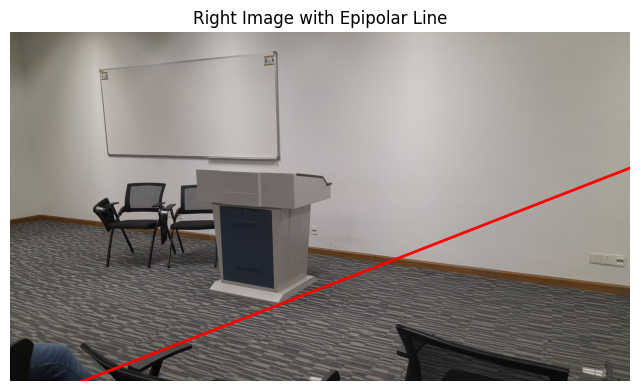

In [5]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np

# Assuming you have the right image loaded as 'right_image'
# Assuming you have the normalized line coefficients 'normalized_l_prime'

# Get the size of the right image
height, width = right_image.shape[:2]

# Plot the epipolar line in the right image
a_prime, b_prime, c_prime = normalized_l_prime[0], normalized_l_prime[1], normalized_l_prime[2]

# Calculate endpoints for the line
x0, y0 = 0, int(-c_prime / b_prime)
x1, y1 = width, int(-(a_prime * width + c_prime) / b_prime)

# Display the right image with the epipolar line using Matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(right_image)
plt.title('Right Image with Epipolar Line')

# Plot the line using Matplotlib's Line2D
line = mlines.Line2D([x0, x1], [y0, y1], color='red', linewidth=2)
plt.gca().add_line(line)

plt.axis('off')  # Hide axes
plt.show()


In [6]:
TestPoint = (1500, 1500, 1)

l_prime = np.dot(TestPoint, fMatrix)

print(l_prime)

normalized_l_prime = l_prime / np.linalg.norm(l_prime[:2])

print(normalized_l_prime)

[-1.45664153e-04  6.74981969e-05  1.15925777e-01]
[-9.07321782e-01  4.20436897e-01  7.22085566e+02]


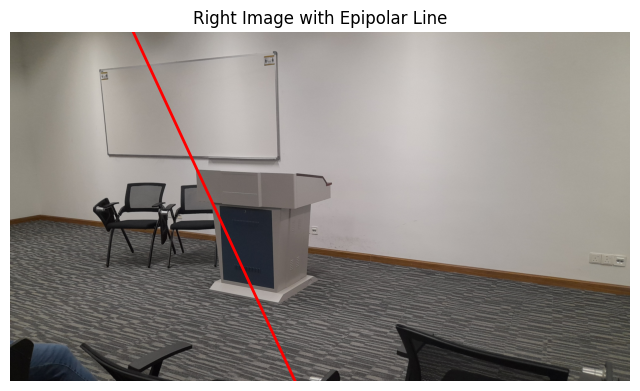

In [7]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np

# Assuming you have the right image loaded as 'right_image'
# Assuming you have the normalized line coefficients 'normalized_l_prime'

# Get the size of the right image
height, width = right_image.shape[:2]

# Plot the epipolar line in the right image
a_prime, b_prime, c_prime = normalized_l_prime[0], normalized_l_prime[1], normalized_l_prime[2]

# Calculate endpoints for the line
x0, y0 = 0, int(-c_prime / b_prime)
x1, y1 = width, int(-(a_prime * width + c_prime) / b_prime)

# Display the right image with the epipolar line using Matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(right_image)
plt.title('Right Image with Epipolar Line')

# Plot the line using Matplotlib's Line2D
line = mlines.Line2D([x0, x1], [y0, y1], color='red', linewidth=2)
plt.gca().add_line(line)

plt.axis('off')  # Hide axes
plt.show()


In [8]:
TestPoint = (3740, 1424, 1) # right to left

l_prime = np.dot(fMatrix, TestPoint)

print(l_prime)

normalized_l_prime = l_prime / np.linalg.norm(l_prime[:2])

print(normalized_l_prime)

[ 7.32667615e-04 -1.51288760e-06 -1.42947281e+00]
[ 9.99997868e-01 -2.06489866e-03 -1.95104811e+03]


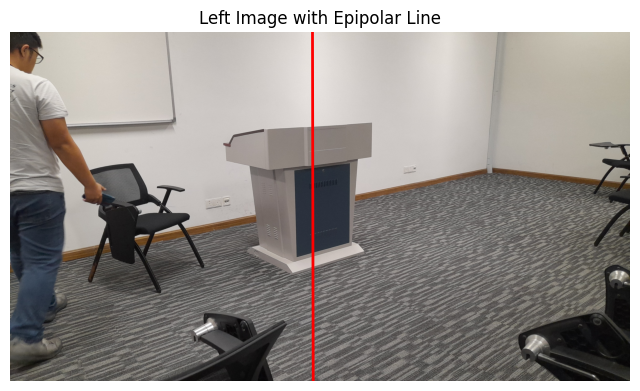

In [9]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np

# Assuming you have the right image loaded as 'right_image'
# Assuming you have the normalized line coefficients 'normalized_l_prime'

# Get the size of the right image
height, width = right_image.shape[:2]

# Plot the epipolar line in the right image
a_prime, b_prime, c_prime = normalized_l_prime[0], normalized_l_prime[1], normalized_l_prime[2]

# Calculate endpoints for the line
x0, y0 = 0, int(-c_prime / b_prime)
x1, y1 = width, int(-(a_prime * width + c_prime) / b_prime)

# Display the right image with the epipolar line using Matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(left_image)
plt.title('Left Image with Epipolar Line')

# Plot the line using Matplotlib's Line2D
line = mlines.Line2D([x0, x1], [y0, y1], color='red', linewidth=2)
plt.gca().add_line(line)

plt.axis('off')  # Hide axes
plt.show()